import numpy as np 

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [4]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits = 1,train_size = 0.8,test_size = 0.2,random_state=0)
train_index,test_index = next(ss.split(X,y))
X_train,X_test = X[train_index],X[test_index]
y_train,y_test = y[train_index],y[test_index]

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [8]:
skb = SelectKBest(chi2,k=20)

In [9]:
skb.fit(X_train,y_train)

SelectKBest(k=20, score_func=<function chi2 at 0x1152580d0>)

In [10]:
X_train_new = skb.transform(X_train)

In [11]:
X_train_new.shape,X_train.shape

((455, 20), (455, 30))

In [12]:
skb.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False], dtype=bool)

In [13]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [14]:
from sklearn.model_selection import StratifiedKFold
k_range = np.arange(1,31)
scores = []
std= []
for k in k_range:
    ss = StratifiedKFold(n_splits=10,shuffle = True)
    score = []
    for train_index,val_index in ss.split(X_train,y_train):
        X_train2,X_val = X[train_index],X[val_index]
        y_train2,y_val = y[train_index],y[val_index]
        
        skb = SelectKBest(chi2,k=k)
        skb.fit(X_train2,y_train2)
        
        X_new_train2 = skb.transform(X_train2)
        X_new_val = skb.transform(X_val)
        
        clf.fit(X_new_train2,y_train2)
        score.append(clf.score(X_new_val,y_val))
    
    scores.append(np.array(score).mean())
    std.append(np.array(score).std())
    
scores = np.array(scores)
std = np.array(std)

In [15]:
scores

array([ 0.90995169,  0.92743961,  0.91879227,  0.91879227,  0.93400966,
        0.94289855,  0.94521739,  0.94062802,  0.95613527,  0.96033816,
        0.95381643,  0.96256039,  0.95821256,  0.96256039,  0.95391304,
        0.96251208,  0.95584541,  0.96057971,  0.96251208,  0.96256039,
        0.95386473,  0.96285024,  0.96497585,  0.95826087,  0.95835749,
        0.9605314 ,  0.96038647,  0.96043478,  0.962657  ,  0.96270531])

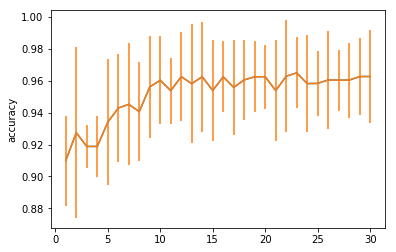

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,scores)
plt.errorbar(k_range,scores,yerr = std)
plt.ylabel("accuracy")

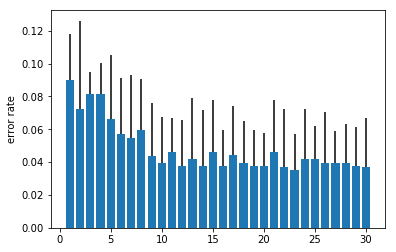

In [17]:
plt.bar(k_range, 1-scores, yerr=[np.zeros(std.shape),
                                 std])
plt.ylabel("error rate")

In [18]:
best_k = k_range[np.argmax(scores)]
best_k

23

In [20]:
skb = SelectKBest(chi2,k = best_k)

In [21]:
skb.fit(X_train,y_train)

SelectKBest(k=23, score_func=<function chi2 at 0x1152580d0>)

In [23]:
X_train_best = skb.transform(X_train)
X_test_bset = skb.transform(X_test)

In [25]:
clf.fit(X_train_best,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
clf.score()